In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
df = pd.read_csv('glass (1).csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df['Type'].nunique()

6

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


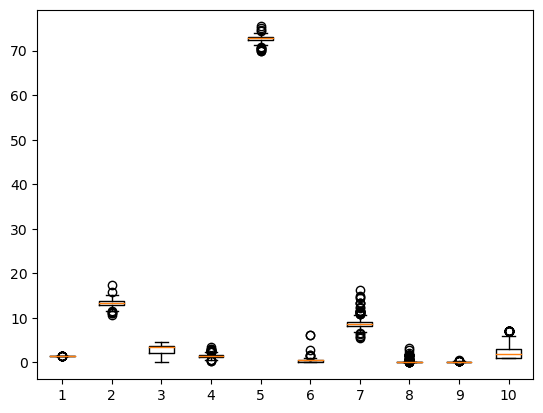

In [6]:
plt.boxplot(df)
plt.show()

In [7]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

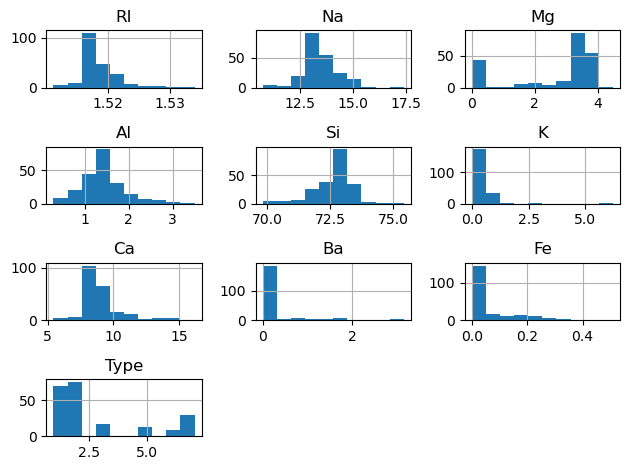

In [8]:
df.hist()
plt.tight_layout()

In [9]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

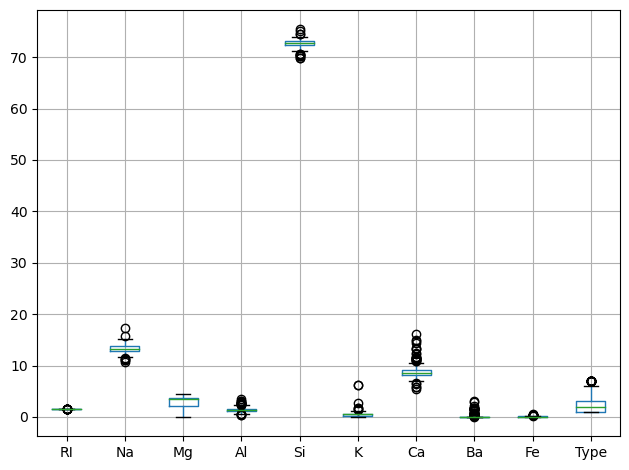

In [10]:
df.boxplot(column=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])
plt.tight_layout()

<AxesSubplot:>

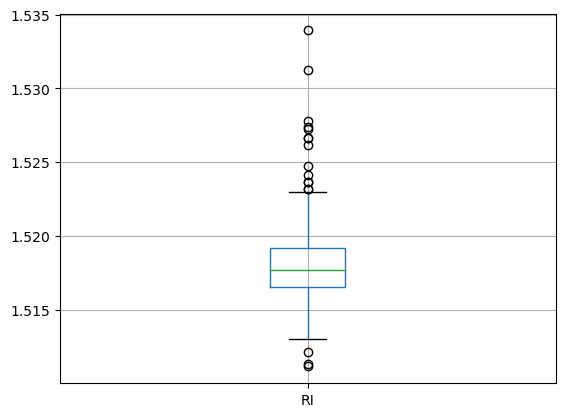

In [11]:
df.boxplot(column=['RI'])

In [12]:
median_ri = df['RI'].median()
median_ri

1.51768

In [13]:
df["RI"] = np.where(df["RI"] >1.522, median_ri,df['RI'])

<AxesSubplot:>

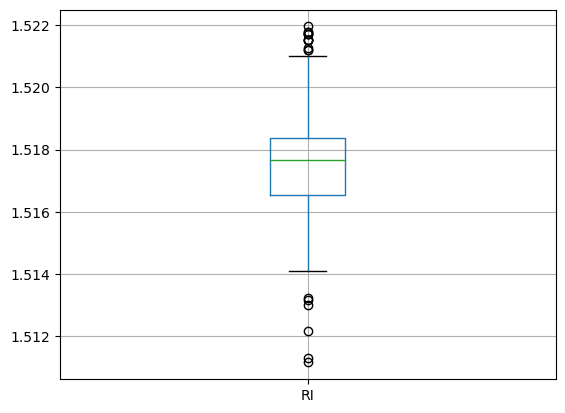

In [14]:
df.boxplot(column=['RI'])

In [15]:
df["RI"] = np.where(df["RI"] >1.519, median_ri,df['RI'])

<AxesSubplot:>

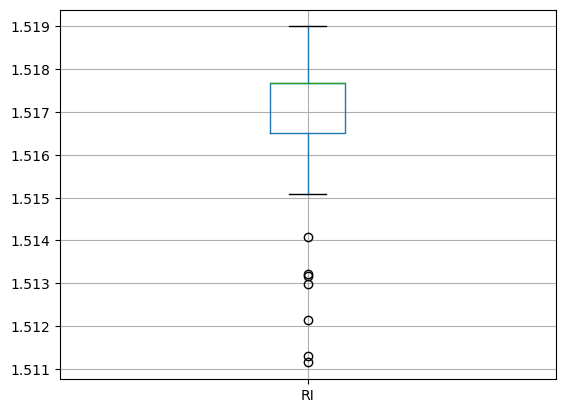

In [16]:
df.boxplot(column=['RI'])

<AxesSubplot:>

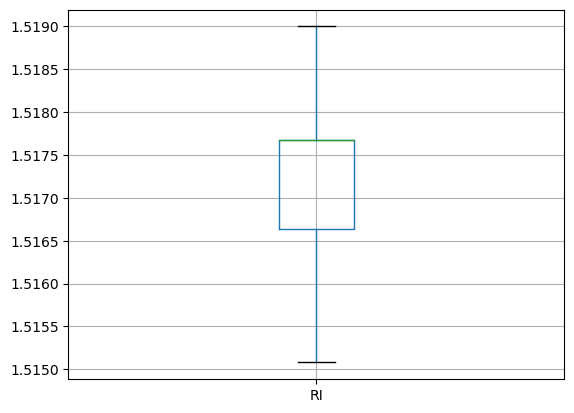

In [17]:
df["RI"] = np.where(df["RI"] <1.515, median_ri,df['RI'])
df.boxplot(column=['RI'])

<AxesSubplot:>

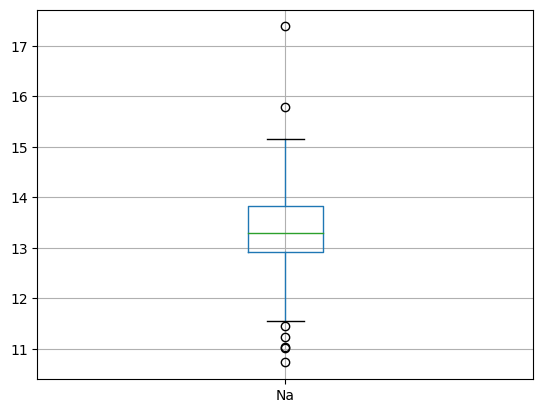

In [18]:
df.boxplot(column=['Na'])

<AxesSubplot:>

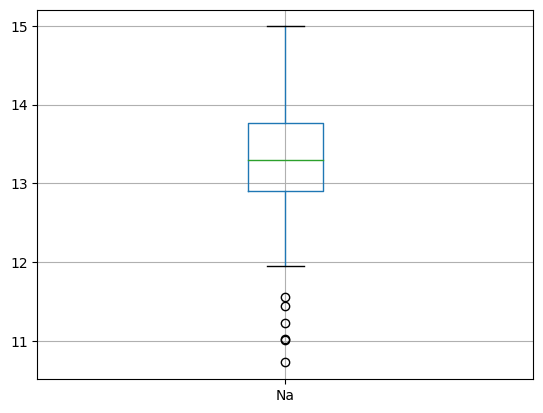

In [19]:
median_na = df['Na'].median()
df["Na"]= np.where(df["Na"] >15, median_na,df['Na'])
df.boxplot(column=['Na'])



<AxesSubplot:>

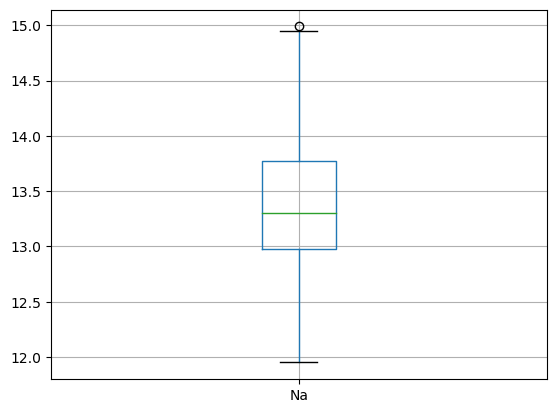

In [20]:
df["Na"]= np.where(df["Na"] <11.9, median_na,df['Na'])
df.boxplot(column=['Na'])

<AxesSubplot:>

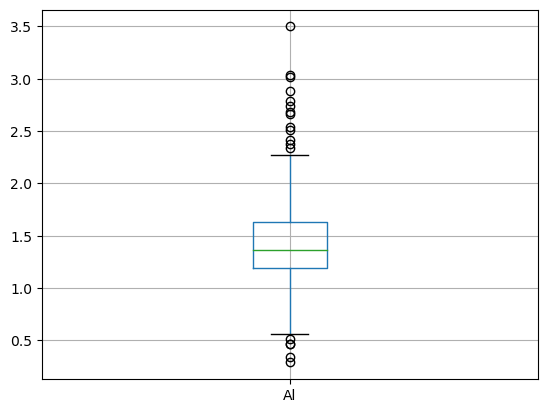

In [21]:
df.boxplot(column=['Al'])

In [22]:
median_ai = df['Al'].median()
median_ai

1.36

In [23]:
mode_ai = df['Al'].mode()
mode_ai

0    1.54
Name: Al, dtype: float64

<AxesSubplot:>

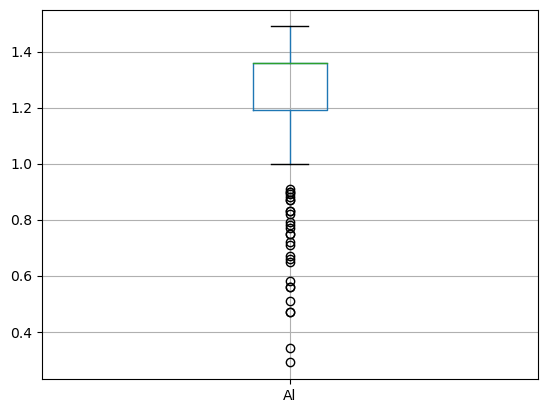

In [24]:

df["Al"]= np.where(df["Al"] >1.5, median_ai,df['Al'])
df.boxplot(column=['Al'])



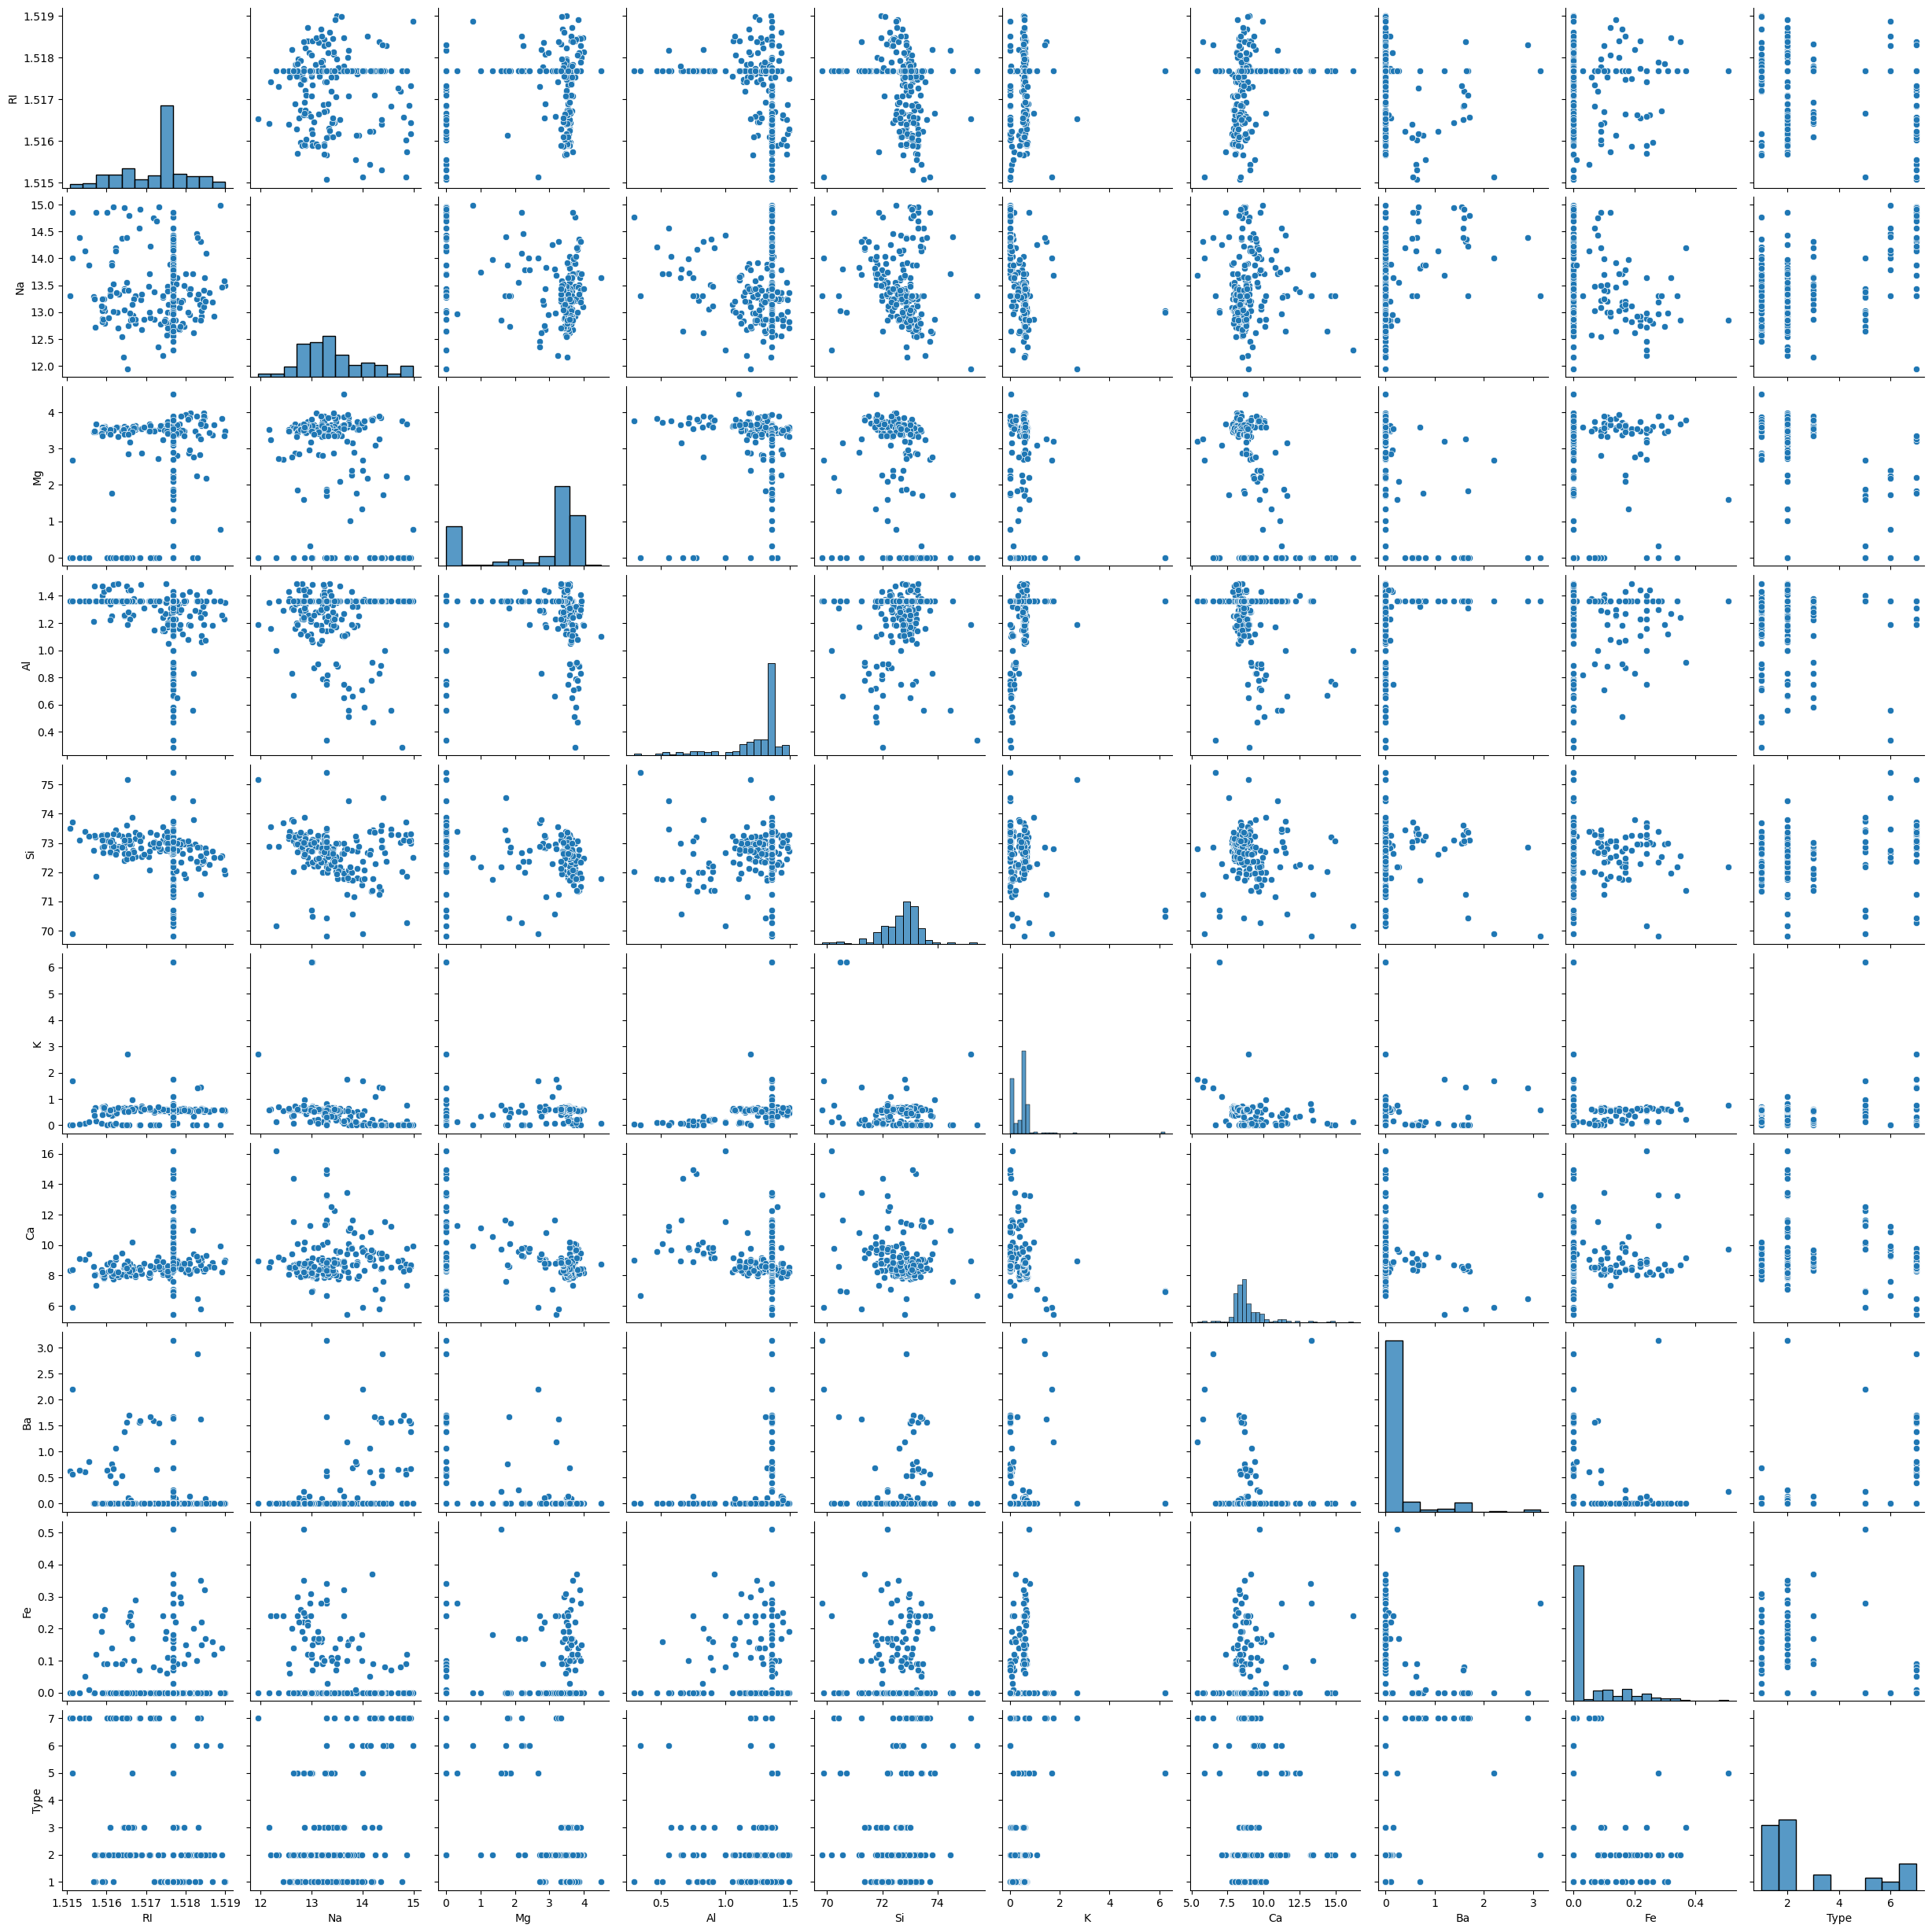

In [25]:
sns.pairplot(df)

In [26]:
x = df.iloc[:,1:]
y = df['Type']

In [27]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.34963522,  1.25463857, -0.57415045, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [ 0.74737036,  0.63616803,  0.54166272, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [ 0.17463175,  0.60142249,  0.54166272, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 1.49511244, -1.86551055,  0.54166272, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [ 1.52693125, -1.86551055,  0.54166272, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [ 1.28829017, -1.86551055,  0.54166272, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [30]:
ypred

array([2, 7, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 2, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 1, 2, 2, 5, 1, 1, 7, 7],
      dtype=int64)

In [31]:
print(confusion_matrix(ytest,ypred))

[[17  2  0  0  0  0]
 [ 1 10  0  1  0  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.81      0.89      0.85        19
           2       0.67      0.83      0.74        12
           3       0.00      0.00      0.00         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.77        43
   macro avg       0.66      0.79      0.71        43
weighted avg       0.67      0.77      0.71        43



D:\new python notebook\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\new python notebook\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\new python notebook\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
db = DBSCAN()

In [34]:
db.fit(xtrain,ytrain)
ypred_ = db.fit_predict(xtest)

In [35]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(x,db.fit_predict(x))

-0.207650364502734

In [38]:
db = DBSCAN(eps=1,min_samples=7)
y_label =db.fit_predict(x)

In [39]:
y_label

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1], dtype=int64)

In [40]:
silhouette_score(x,db.fit_predict(x))

0.24503422698479588

In [42]:
df['cluster'] = y_label

In [43]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,cluster
0,1.51768,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,-1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,1.51618,13.53,3.55,1.36,72.99,0.39,7.78,0.00,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,1.36,72.61,0.08,9.18,1.06,0.0,7,-1
210,1.51685,14.92,0.00,1.36,73.06,0.00,8.40,1.59,0.0,7,1
211,1.51768,14.36,0.00,1.36,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.36,73.61,0.00,8.48,1.57,0.0,7,1
